<a href="https://colab.research.google.com/github/herculeshamanaka/ds-py-covid-19-brazil/blob/main/COVID_19_General_overview_for_Brazil_and_the_World_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://github.com/herculeshamanaka/data_science/blob/main/img/HerculesH.png?raw=true" width="30%">
</p>

# **1. COVID-19: General Overview for Brazil and the World**
---

* DSNP 3.0 - Project Module Two
* In this notebook we will analyze the Covid-19 situation in Brazil and also compare it with the world






<p align="center">
  <img src="https://github.com/herculeshamanaka/ds-py-covid-19-brazil/blob/main/img/Covid19-Cover.jpg?raw=true" width="70%" />
</p>

## **1.1 What is COVID-19?**

The Coronavirus disease, COVID-19, is an infectious disease caused by the SARS-CoV-2 virus.

Anyone can get sick with COVID-19 and become seriously ill or die at any age.

Those infected with the virus may experience mild to moderate respiratory illness and recover without requiring special treatment. Older people and those with underlying medical conditions like diabetes, cardiovascular disease, chronic respiratory disaese, obesity are more likely to develop serious illness.

The virus has zoonotic origins and has close genetic similarity to the bat coronavirus, suggesting it emerged from a bat-borne virus.

## **1.2 When and where it started?**

The virus was first identified in the city of Wuhan, Hubei, China. On 30 January of 2020 the Public Health Emergency of International Concern declared a outbreak and a pandemic on 11 March 2020.

## **1.3 Symptoms and Prevention**
In the infographic below you can find more information.

<p align="center">
  <img src="https://github.com/herculeshamanaka/ds-py-covid-19-brazil/blob/main/img/Covid19-Symptoms-and-Prevention.jpg?raw=true" width="80%" />
</p>

# **2. Data Source**

---

All the source to this analysis was extracted from [this repository](https://github.com/owid/covid-19-data/tree/master/public/data). In this repository it's possible to find data from vaccinations, confirmed cases, test, policy responses among other for many countries.

Since the disease is new there are many conflicts between federal government, state government and non oficial data.

The file `owid-covid-data` will be used as the main source and the last updated date was March 15h.

## 2.1 **COVID-19 Data import**

First, lets import the `csv` file to our dataframe and have a first look on the data.

In [246]:
# importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [247]:
# importing COVID csv file to the Dataframe
covidDF = pd.read_csv(
    "https://raw.githubusercontent.com/herculeshamanaka/ds-py-covid-19-brazil/main/data/owid-covid-data.csv", 
    low_memory=False)


In [248]:
# checking the first rows
covidDF.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## **2.2 Data dictionary**

Below you can find all dataset attributes:

| Field Name | Description | Category | Source |
|:------------| :------------| :------------| :------------
|`iso_code`|ISO 3166-1 alpha-3 – three-letter country codes|International Organization for Standardization|Others|
|`continent`|Continent of the geographical location|Our World in Data|Others|
|`location`|Geographical location|Our World in Data|Others|
|`date`|Date of observation|Our World in Data|Others|
|`total_cases`|Total confirmed cases of COVID-19. Counts can include probable cases, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed cases|
|`new_cases`|New confirmed cases of COVID-19. Counts can include probable cases, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed cases|
|`new_cases_smoothed`|New confirmed cases of COVID-19 (7-day smoothed). Counts can include probable cases, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed cases|
|`total_deaths`|Total deaths attributed to COVID-19. Counts can include probable deaths, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed deaths|
|`new_deaths`|New deaths attributed to COVID-19. Counts can include probable deaths, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed deaths|
|`new_deaths_smoothed`|New deaths attributed to COVID-19 (7-day smoothed). Counts can include probable deaths, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed deaths|
|`total_cases_per_million`|Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed cases|
|`new_cases_per_million`|New confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed cases|
|`new_cases_smoothed_per_million`|New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable cases, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed cases|
|`total_deaths_per_million`|Total deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed deaths|
|`new_deaths_per_million`|New deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed deaths|
|`new_deaths_smoothed_per_million`|New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable deaths, where reported.|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University|Confirmed deaths|
|`reproduction_rate`|Real-time estimate of the effective reproduction rate (R) of COVID-19. See https://github.com/crondonm/TrackingR/tree/main/Estimates-Database|Arroyo Marioli et al. (2020). https://doi.org/10.2139/ssrn.3581633|Reproduction rate|
|`icu_patients`|Number of COVID-19 patients in intensive care units (ICUs) on a given day|National government reports and European CDC|Hospital & ICU|
|`icu_patients_per_million`|Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people|National government reports and European CDC|Hospital & ICU|
|`hosp_patients`|Number of COVID-19 patients in hospital on a given day|National government reports and European CDC|Hospital & ICU|
|`hosp_patients_per_million`|Number of COVID-19 patients in hospital on a given day per 1,000,000 people|National government reports and European CDC|Hospital & ICU|
|`weekly_icu_admissions`|Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week|National government reports and European CDC|Hospital & ICU|
|`weekly_icu_admissions_per_million`|Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 people|National government reports and European CDC|Hospital & ICU|
|`weekly_hosp_admissions`|Number of COVID-19 patients newly admitted to hospitals in a given week|National government reports and European CDC|Hospital & ICU|
|`weekly_hosp_admissions_per_million`|Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people|National government reports and European CDC|Hospital & ICU|
|`total_tests`|Total tests for COVID-19|National government reports|Tests & positivity|
|`new_tests`|New tests for COVID-19 (only calculated for consecutive days)|National government reports|Tests & positivity|
|`total_tests_per_thousand`|Total tests for COVID-19 per 1,000 people|National government reports|Tests & positivity|
|`new_tests_per_thousand`|New tests for COVID-19 per 1,000 people|National government reports|Tests & positivity|
|`new_tests_smoothed`|New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window|National government reports|Tests & positivity|
|`new_tests_smoothed_per_thousand`|New tests for COVID-19 (7-day smoothed) per 1,000 people|National government reports|Tests & positivity|
|`positive_rate`|The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)|National government reports|Tests & positivity|
|`tests_per_case`|Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of positive_rate)|National government reports|Tests & positivity|
|`tests_units`|Units used by the location to report its testing data|National government reports|Tests & positivity|
|`total_vaccinations`|Total number of COVID-19 vaccination doses administered|National government reports|Vaccinations|
|`people_vaccinated`|Total number of people who received at least one vaccine dose|National government reports|Vaccinations|
|`people_fully_vaccinated`|Total number of people who received all doses prescribed by the vaccination protocol|National government reports|Vaccinations|
|`total_boosters`|Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the vaccination protocol)|National government reports|Vaccinations|
|`new_vaccinations`|New COVID-19 vaccination doses administered (only calculated for consecutive days)|National government reports|Vaccinations|
|`new_vaccinations_smoothed`|New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window|National government reports|Vaccinations|
|`total_vaccinations_per_hundred`|Total number of COVID-19 vaccination doses administered per 100 people in the total population|National government reports|Vaccinations|
|`people_vaccinated_per_hundred`|Total number of people who received at least one vaccine dose per 100 people in the total population|National government reports|Vaccinations|
|`people_fully_vaccinated_per_hundred`|Total number of people who received all doses prescribed by the vaccination protocol per 100 people in the total population|National government reports|Vaccinations|
|`total_boosters_per_hundred`|Total number of COVID-19 vaccination booster doses administered per 100 people in the total population|National government reports|Vaccinations|
|`new_vaccinations_smoothed_per_million`|New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total population|National government reports|Vaccinations|
|`new_people_vaccinated_smoothed`|Daily number of people receiving their first vaccine dose (7-day smoothed)|National government reports|Vaccinations|
|`new_people_vaccinated_smoothed_per_hundred`|Daily number of people receiving their first vaccine dose (7-day smoothed) per 100 people in the total population|National government reports|Vaccinations|
|`stringency_index`|Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)|Oxford COVID-19 Government Response Tracker, Blavatnik School of Government|Policy responses|
|`population`|Population (latest available values). See https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_latest.csv for full list of sources|United Nations, Department of Economic and Social Affairs, Population Division, World Population Prospects 2019 Revision|Others|
|`population_density`|Number of people divided by land area, measured in square kilometers, most recent year available|World Bank World Development Indicators, sourced from Food and Agriculture Organization and World Bank estimates|Others|
|`median_age`|Median age of the population, UN projection for 2020|UN Population Division, World Population Prospects, 2017 Revision|Others|
|`aged_65_older`|Share of the population that is 65 years and older, most recent year available|World Bank World Development Indicators based on age/sex distributions of United Nations World Population Prospects 2017 Revision|Others|
|`aged_70_older`|Share of the population that is 70 years and older in 2015|United Nations, Department of Economic and Social Affairs, Population Division (2017), World Population Prospects 2017 Revision|Others|
|`gdp_per_capita`|Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available|World Bank World Development Indicators, source from World Bank, International Comparison Program database|Others|
|`extreme_poverty`|Share of the population living in extreme poverty, most recent year available since 2010|World Bank World Development Indicators, sourced from World Bank Development Research Group|Others|
|`cardiovasc_death_rate`|Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)|Global Burden of Disease Collaborative Network, Global Burden of Disease Study 2017 Results|Others|
|`diabetes_prevalence`|Diabetes prevalence (% of population aged 20 to 79) in 2017|World Bank World Development Indicators, sourced from International Diabetes Federation, Diabetes Atlas|Others|
|`female_smokers`|Share of women who smoke, most recent year available|World Bank World Development Indicators, sourced from World Health Organization, Global Health Observatory Data Repository|Others|
|`male_smokers`|Share of men who smoke, most recent year available|World Bank World Development Indicators, sourced from World Health Organization, Global Health Observatory Data Repository|Others|
|`handwashing_facilities`|Share of the population with basic handwashing facilities on premises, most recent year available|United Nations Statistics Division|Others|
|`hospital_beds_per_thousand`|Hospital beds per 1,000 people, most recent year available since 2010|OECD, Eurostat, World Bank, national government records and other sources|Others|
|`life_expectancy`|Life expectancy at birth in 2019|James C. Riley, Clio Infra, United Nations Population Division|Others|
|`human_development_index`|A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from http://hdr.undp.org/en/indicators/137506|United Nations Development Programme (UNDP)|Others|
|`excess_mortality`|Percentage difference between the reported number of weekly or monthly deaths in 2020–2021 and the projected number of deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality|Human Mortality Database (2021), World Mortality Dataset (2021)|Excess mortality|
|`excess_mortality_cumulative`|Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative projected deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality|Human Mortality Database (2021), World Mortality Dataset (2021)|Excess mortality|
|`excess_mortality_cumulative_absolute`|Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality|Human Mortality Database (2021), World Mortality Dataset (2021)|Excess mortality|
|`excess_mortality_cumulative_per_million`||Human Mortality Database (2021), World Mortality Dataset (2021)|Excess mortality|

In [249]:
# changing pandas max rows
pd.set_option('max_rows', 99999)

# checking the missing values percentage by attribute
round((covidDF.isnull().sum() / covidDF.shape[0]).sort_values(ascending=False),2) * 100

weekly_icu_admissions_per_million             97.0
weekly_icu_admissions                         97.0
excess_mortality_cumulative_per_million       97.0
excess_mortality                              97.0
excess_mortality_cumulative                   97.0
excess_mortality_cumulative_absolute          97.0
weekly_hosp_admissions_per_million            93.0
weekly_hosp_admissions                        93.0
total_boosters                                89.0
total_boosters_per_hundred                    89.0
icu_patients_per_million                      86.0
icu_patients                                  86.0
hosp_patients                                 85.0
hosp_patients_per_million                     85.0
new_vaccinations                              78.0
people_fully_vaccinated                       76.0
people_fully_vaccinated_per_hundred           76.0
people_vaccinated                             74.0
people_vaccinated_per_hundred                 74.0
total_vaccinations_per_hundred 

Many attributes have high percentage of missing values.

# **3. Exploratory Analysis**

---

Lets start the data exploratory analysis. 

## **3.1 Dataset info**

We will check the dataset dimensions, variables data type and missing values percentage.

In [250]:
# checking the dataset dimensions
print(
  'Dataset dimensions',
  '\nVariables: ', covidDF.shape[1], "\n"
  'Entries count: ', covidDF.shape[0])

Dataset dimensions 
Variables:  67 
Entries count:  168157


In [251]:
# checking more info about the dataset
covidDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168157 entries, 0 to 168156
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    168157 non-null  object 
 1   continent                                   158097 non-null  object 
 2   location                                    168157 non-null  object 
 3   date                                        168157 non-null  object 
 4   total_cases                                 165117 non-null  float64
 5   new_cases                                   164922 non-null  float64
 6   new_cases_smoothed                          162932 non-null  float64
 7   total_deaths                                147205 non-null  float64
 8   new_deaths                                  147214 non-null  float64
 9   new_deaths_smoothed                         145100 non-null  float64
 

## **3.2 Date variable conversion**

By checking the dataset variables it's possible to notice that the `date` variable is not on a datetime format. To maximize the exploratory process of this column, lets modify it's data type to datetime.

In [252]:
# modifying the date variable type
covidDF.date = pd.to_datetime(covidDF.date)

Now lets check if the conversion worked.

In [253]:
# checking the most recent date of the dataset
covidDF.date.max()

Timestamp('2022-03-13 00:00:00')

This is a function which will apply a custom format the X or Y Axis values

In [254]:
# importing the FuncFormatter to custom format the Y Axis
from matplotlib.ticker import FuncFormatter

# function to format the Y axes
def axis_fmt(axis, pos):
  decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
  suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
  if axis == 0:
      return str(0)
  for i, d in enumerate(decades):
    if np.abs(axis) >=d:
      val = axis/float(d)
      signf = len(str(val).split(".")[1])
      if signf == 0:
          return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
      else:
        if signf == 1:
          if str(val).split(".")[1] == "0":
              return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
        tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
        return tx.format(val=val, suffix=suffix[i])
  return axis

## **3.3 Missing Values**

An important step of an dataset analysis is to check the missing values.  It's important to check in the initial analysis if the missing values are significant when compared to the amount of entries.

In [255]:
# checking the missing values
round((covidDF.isnull().sum() / covidDF.shape[0]).sort_values(ascending=False),2)

weekly_icu_admissions_per_million             0.97
weekly_icu_admissions                         0.97
excess_mortality_cumulative_per_million       0.97
excess_mortality                              0.97
excess_mortality_cumulative                   0.97
excess_mortality_cumulative_absolute          0.97
weekly_hosp_admissions_per_million            0.93
weekly_hosp_admissions                        0.93
total_boosters                                0.89
total_boosters_per_hundred                    0.89
icu_patients_per_million                      0.86
icu_patients                                  0.86
hosp_patients                                 0.85
hosp_patients_per_million                     0.85
new_vaccinations                              0.78
people_fully_vaccinated                       0.76
people_fully_vaccinated_per_hundred           0.76
people_vaccinated                             0.74
people_vaccinated_per_hundred                 0.74
total_vaccinations_per_hundred 

## 3.3 **Correlations between variables**

Correlation means that there is a mutual relationship/connection between two or more things. In this context we are seeking for a relationship between two variables.

This relationship can be measured and the correlation coefficient determines the intensity of it.

To identify the existing correlations among the variables of interest, we will:


* Create a correlation matrix
* Generate a heatmap from this matriz using the `seaborn` lib

In [256]:
# creating a correlation matrix
correlationDF = covidDF[[
  'people_vaccinated',
  'people_fully_vaccinated',
  'new_deaths',
  'new_cases',
  'total_deaths',
  'total_cases'
]].corr()

# display the correlation matrix
display(correlationDF)

,people_vaccinated,people_fully_vaccinated,new_deaths,new_cases,total_deaths,total_cases
people_vaccinated,1.000000,0.981589,0.523416,0.621209,0.830075,0.849929
people_fully_vaccinated,0.981589,1.000000,0.479326,0.635314,0.796771,0.829239
new_deaths,0.523416,0.479326,1.000000,0.665893,0.776861,0.713830
new_cases,0.621209,0.635314,0.665893,1.000000,0.741329,0.812707
total_deaths,0.830075,0.796771,0.776861,0.741329,1.000000,0.965181
total_cases,0.849929,0.829239,0.713830,0.812707,0.965181,1.000000


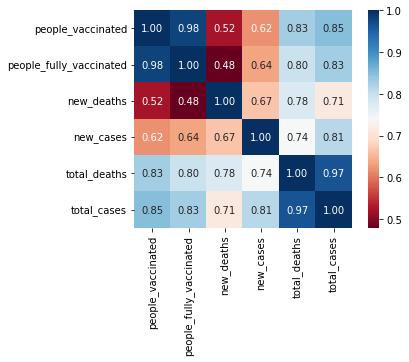

In [257]:
# ploting a heatmap from the correlation matrix
sns.heatmap(correlationDF,
            cmap='RdBu',
            fmt='.2f',
            square=True,
            linecolor='white',
            annot=True);

In [258]:
# constants for the remaining sections
RED = '#f54000'
BLUE = '#1024a3'
GREEN = '#48a308'

## **3.4 Total cases / Number of new cases**

Lets analyze the `total_cases`and `new_cases` variables for the world and for Brazil.

### **3.4.1 Total cases - Top 10 countries** 🌎

In [259]:
# checking the top 10 countries in total cases on 8 February
top10CountriesTotalCases = covidDF.loc[
  (covidDF.continent.isnull() == False) &
  (covidDF.total_cases.isnull() == False)
].groupby(
    covidDF.location,
    sort=True
).total_cases.max().reset_index()

top10CountriesTotalCases = top10CountriesTotalCases.sort_values('total_cases', ascending=False)[:10]

top10CountriesTotalCases

,location,total_cases
204,United States,79523228.0
90,India,42993494.0
27,Brazil,29374833.0
70,France,23563607.0
203,United Kingdom,19586575.0
75,Germany,17271708.0
159,Russia,17084672.0
198,Turkey,14551665.0
97,Italy,13373207.0
182,Spain,11223974.0


Lets plot the data to have a better visualization:

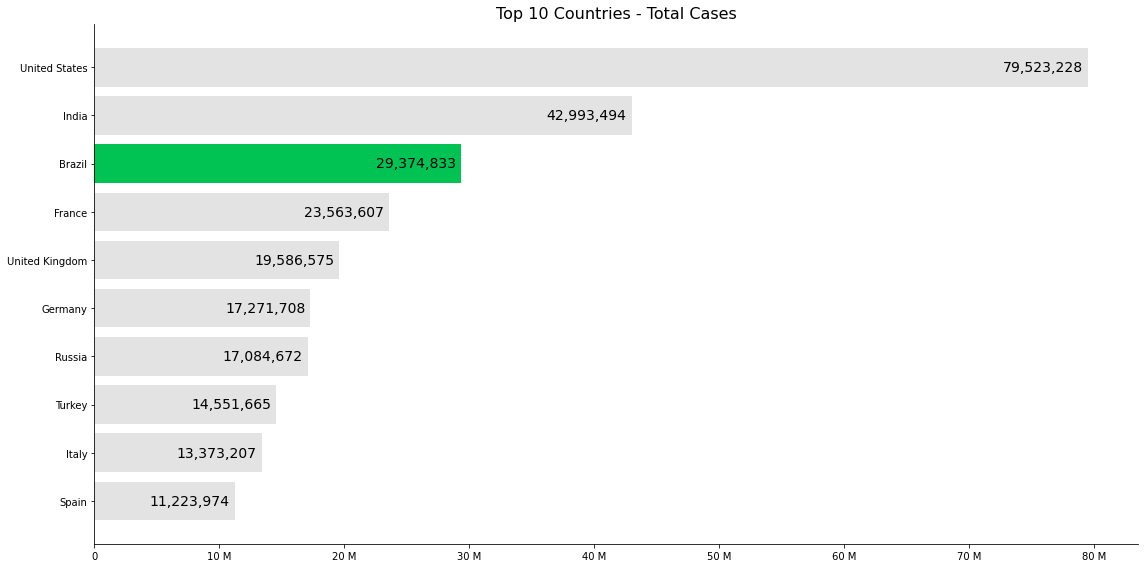

In [260]:
fig, ax = plt.subplots(figsize=(16,8))

# defining the bar colors green for Brazil gray from others
barColors = np.where(top10CountriesTotalCases.location == 'Brazil', '#00c353', '#e3e3e3')

# creating the chart bar in horizontal
chartBars = ax.barh(
  'location', 
  'total_cases', 
  data=top10CountriesTotalCases,
  color=barColors
);

# iterating thru the bars and adding the labels
for bar in chartBars:
  width = bar.get_width().astype(int) #Previously we got the height
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(
    width - 6800000, 
    label_y_pos, 
    s=f'{width:,d}', 
    va='center', 
    fontsize=14
  )

# formating X Axis
ax.xaxis.set_major_formatter(FuncFormatter(axis_fmt));

# setting the plot title
ax.set_title(
  'Top 10 Countries - Total Cases',
  fontsize=16  
)

# remove the spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# inverting the Y Axis 
plt.gca().invert_yaxis()

plt.tight_layout()

### **3.4.2 Number of New Cases - World** 🌎

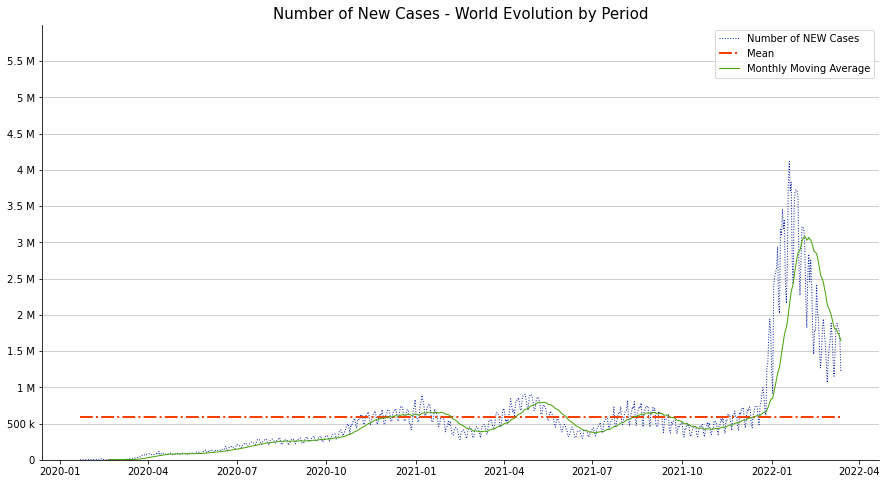

In [261]:
fig, ax = plt.subplots(figsize=(15,8))

# total of new cases in the world
newCasesDF = covidDF.loc[
  (covidDF.location == 'World'),
  ['date','new_cases']
]

# creating a moving average by month
newCasesDF['monthly_mov_avg'] = newCasesDF.new_cases.rolling(
    window=30
).mean()

# ploting the new cases over the period
ax.plot(
  'date',
  'new_cases',
  data=newCasesDF,
  label='Number of NEW Cases',
  color=BLUE,
  linewidth=1,
  linestyle=':'
);

newCasesMean = newCasesDF.new_cases.mean()

# ploting the mean
ax.plot(
  newCasesDF.date, 
  [newCasesMean]*len(newCasesDF), 
  label='Mean',
  color=RED, 
  linewidth=2, 
  linestyle='-.');

# ploting the monthly moving average
ax.plot(
  'date',
  'monthly_mov_avg',
  data=newCasesDF,
  label='Monthly Moving Average',
  color=GREEN,
  linewidth=1
);

# remove the spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# formating the Y Axis
plt.ylim(0,6000000);
plt.yticks(ticks=np.arange(0, 6000000, step=500000));
plt.grid(axis='y', alpha=0.75);

ax.yaxis.set_major_formatter(FuncFormatter(axis_fmt));

ax.legend();
ax.set_title(
  'Number of New Cases - World Evolution by Period',
  fontsize=15
);


As we can see by this chart by the end of 2021 the number of new cases increased amazingly (blue line). In the green line we can see the monthly moving average. It also increased on the beginning of 2022.

This was caused by the new COVID-19 variant called **Omicron**.

<p align="center">
  <img src="https://github.com/herculeshamanaka/ds-py-covid-19-brazil/blob/main/img/Covid19-Variants.jpg?raw=true" width="50%"/>
</p>

The **Omicron** variant is highly transmissible. All over the world we can see how fast the number of new cases grew after this new variant was discovered.

### **3.4.3 Number of New Cases - Brazil** 🇧🇷

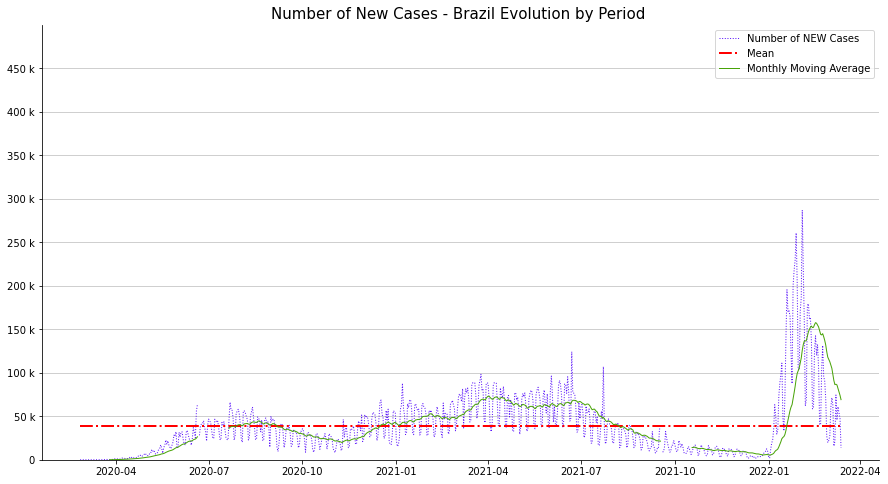

In [262]:
fig, ax = plt.subplots(figsize=(15,8))

# total of new cases in the world
newBRCasesDF = covidDF.loc[
  (covidDF.location == 'Brazil'),
  ['date','new_cases']
]

# creating a moving average by month
newBRCasesDF['monthly_mov_avg'] = newBRCasesDF.new_cases.rolling(
    window=30
).mean()

# ploting the new cases over the period
ax.plot(
  'date',
  'new_cases',
  data=newBRCasesDF,
  label='Number of NEW Cases',
  color='#5a15fa',
  linewidth=1,
  linestyle=':'
);

newBRCasesMean = newBRCasesDF.new_cases.mean()

# ploting the mean
ax.plot(
  newBRCasesDF.date, 
  [newBRCasesMean]*len(newBRCasesDF), 
  color='red', 
  linewidth=2,
  label='Mean',
  linestyle='-.');

# ploting the monthly moving average
ax.plot(
  'date',
  'monthly_mov_avg',
  data=newBRCasesDF,
  label='Monthly Moving Average',
  color='#48a308',
  linewidth=1
);

# remove the spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# formating the Y Axis
plt.ylim(0,500000);
plt.yticks(ticks=np.arange(0, 500000, step=50000));
plt.grid(axis='y', alpha=0.75);

# formating Y Axis
ax.yaxis.set_major_formatter(FuncFormatter(axis_fmt));

# displaying legend
ax.legend();

# set chart title
ax.set_title(
  'Number of New Cases - Brazil Evolution by Period ',
  fontsize=15
);

## **3.5 Number of deaths**

In this section we will analyse the `number_of_deaths` variable for the world and for Brazil.

In [263]:
# total of deaths in the world
covidDF.loc[
  (covidDF.continent.isnull()) &
  (covidDF.total_deaths.isnull() == False)                   
].total_deaths.max()

6044270.0

### **3.5.1 Number of deaths - Top 10 countries** 🌎

Here are the top 10 countries in number of deaths on 15th February:

In [264]:
# checking the top 10 countries in total cases on 8 February
top10DeathsDataFrame = covidDF.loc[
  (covidDF.continent.isnull() == False) &
  (covidDF.total_deaths.isnull() == False)
].sort_values(
  by='total_deaths', 
  ascending=False
  )[:10]

top10DeathsDataFrame.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
159730,USA,North America,United States,2022-03-13,79523228.0,5736.0,35278.571,967720.0,168.0,1271.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
159729,USA,North America,United States,2022-03-12,79517492.0,10462.0,36177.429,967552.0,387.0,1273.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
159728,USA,North America,United States,2022-03-11,79507030.0,52110.0,36867.429,967165.0,1701.0,1260.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
159727,USA,North America,United States,2022-03-10,79454920.0,48318.0,36789.571,965464.0,1645.0,1259.000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
159726,USA,North America,United States,2022-03-09,79406602.0,37595.0,36920.143,963819.0,1976.0,1273.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


Lets visualize it on a bar chart:

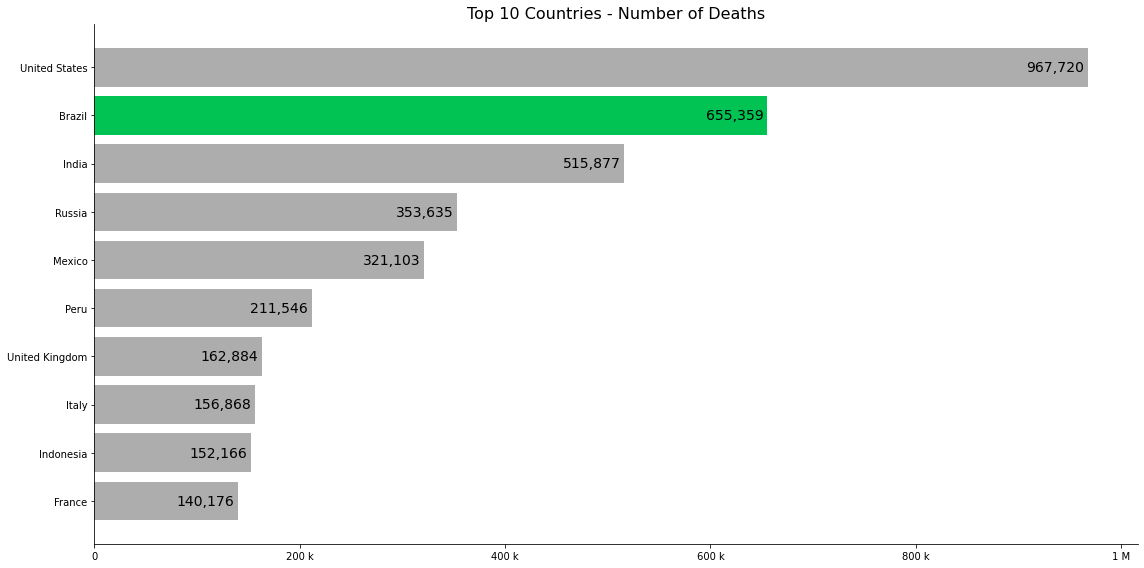

In [265]:
fig, ax = plt.subplots(figsize=(16,8))

# creating a DataFrame for the chart with the top 5 countries
top10DeathsDF = covidDF.loc[
  (covidDF.date == '2022-03-13') & (covidDF.continent.isnull() == False), 
  ['location', 'total_deaths']
].sort_values(
  by="total_deaths", 
  ascending=False
)[:10]

# defining the bar colors green for Brazil and gray for other countries
barColors = np.where(top10DeathsDF.location == 'Brazil', '#00c353', '#adadad')

# creating the chart bar in horizontal
chartBars = ax.barh(
  'location', 
  'total_deaths', 
  data=top10DeathsDF,
  color=barColors
);

# iterating thru the bars and adding the labels
for bar in chartBars:
  width = bar.get_width().astype(int) #Previously we got the height
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(
    width - 60000, 
    label_y_pos, 
    s=f'{width:,d}', 
    va='center', 
    fontsize=14
  )

# setting the plot title
ax.set_title(
  'Top 10 Countries - Number of Deaths',
  fontsize=16  
)

# remove the spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# formating X Axis
ax.xaxis.set_major_formatter(FuncFormatter(axis_fmt));

# inverting the Y Axis 
plt.gca().invert_yaxis()

plt.tight_layout()

### **3.5.2 Number of deaths - World** 🌎

Lets check how the number of deaths in the world evolved during the pandemy:

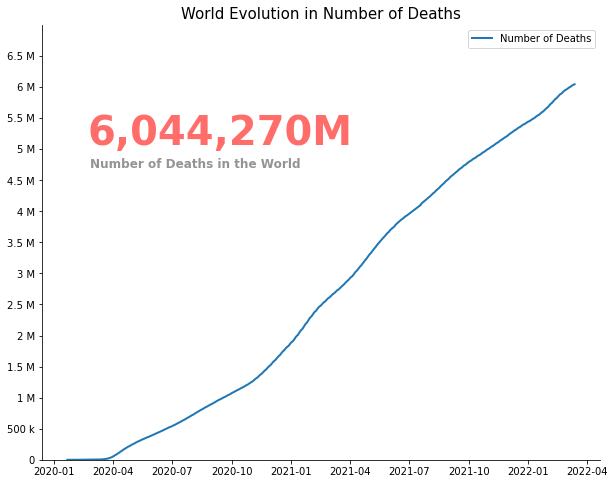

In [266]:
fig, ax = plt.subplots(figsize=(10,8))

# creating a dataframe for the world deaths
deathEvolutionDeathsDF = covidDF.loc[
  (covidDF.location == 'World') &
  (covidDF.total_deaths.isnull() == False),
  ["total_deaths","date"]
].copy()

# ploting the dataframe values
ax.plot(
  'date',
  'total_deaths',
  data=deathEvolutionDeathsDF,
  label='Number of Deaths',
  linewidth=2
);

# remove the spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# formating the Y Axis
plt.ylim(0,7000000);
plt.yticks(ticks=np.arange(0, 7000000, step=500000));
# plt.grid(axis='y', alpha=0.75);

# formating Y Axis
ax.yaxis.set_major_formatter(FuncFormatter(axis_fmt));


# displaying legend
ax.legend();

ax.text(
  220,
  350, 
  str(format(deathEvolutionDeathsDF.total_deaths.max(),'0,.0f')) + 'M', 
  fontsize=40,
  fontweight='bold',
  color='#ff6d6b',
  ha='center', va='center',
  transform=None
)

ax.text(
  195,
  320, 
  'Number of Deaths in the World', 
  fontsize=12,
  fontweight='bold',
  color='#959393',
  ha='center', 
  va='center',
  transform=None
)



# set chart title
ax.set_title(
  'World Evolution in Number of Deaths',
  fontsize=15
);



Now lets create a barchart race for `total_deaths` variable for the top 10 countries in number of deaths.

For this chart we are going to use the [Bar Chart Race](https://www.dexplo.org/bar_chart_race/) library.

In [267]:
# installing the bar_chart_race library
!pip install bar_chart_race -q

In [268]:
# importing the package
import bar_chart_race as bcr

In [269]:
# adapting the dataframe to create a barchart race
totalDeathsRaceDF = covidDF.loc[
  (covidDF.continent.isnull() == False) &
  (covidDF.total_deaths.isnull() == False) &
  (covidDF.location.isin(top10DeathsDF.location))
].filter(['date','location','total_deaths'], axis=1)

# transforming the date column to the period format
totalDeathsRaceDF.date = pd.DatetimeIndex(totalDeathsRaceDF.date).to_period('M')

# group by date and location
totalDeathsRaceDF = totalDeathsRaceDF.groupby(['date','location']).max()

# create a new dataframe like it's required by the library
totalDeathsRacePivotDF = pd.pivot_table(
    totalDeathsRaceDF, 
    values='total_deaths',
    index=['date'],
    columns=['location'],
    fill_value=0
)

# checking the first lines of the dataframe
totalDeathsRacePivotDF.head()

location,Brazil,France,India,Indonesia,Italy,Mexico,Peru,Russia,United Kingdom,United States
date,,,,,,,,,,
2020-02,0,2,0,0,29,0,0,0,0,1
2020-03,201,3526,35,136,12428,29,138,17,2456,5359
2020-04,6006,24349,1154,792,27967,1859,4782,1073,26719,66154
2020-05,29367,28805,5408,1613,33415,9930,20710,4693,37490,107674
2020-06,59792,29846,17400,2876,34767,27769,37898,9306,40441,127365


In [270]:
# ploting the bar chart race
bcr.bar_chart_race(
    df=totalDeathsRacePivotDF, 
    filename=None,
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144, 
    cmap='dark12', 
    title='COVID-19 Total Deaths - Top 10 Countries',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False    
)

### **3.5.3 Number of deaths - Brazil**  🇧🇷 

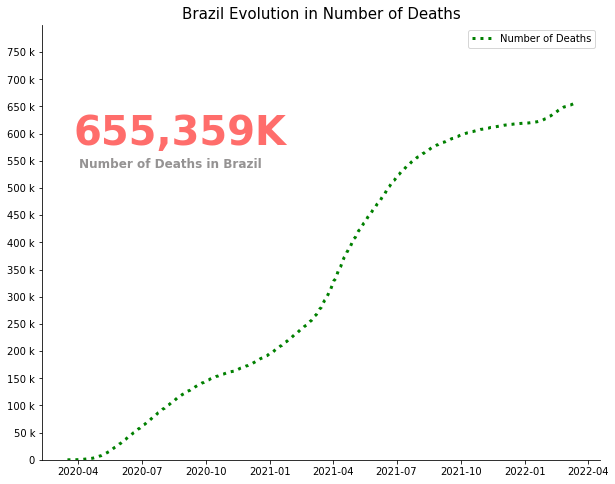

In [271]:
fig, ax = plt.subplots(figsize=(10,8))

# creating a dataframe for the world deaths
deathBREvolutionDF = covidDF.loc[
  (covidDF.location == 'Brazil') &
  (covidDF.total_deaths.isnull() == False),
  ["total_deaths","date"]
]

# ploting the dataframe values
ax.plot(
  'date',
  'total_deaths',
  data=deathBREvolutionDF,
  label='Number of Deaths',
  color='green',
  linewidth=3,
  linestyle=':'
);

# remove the spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# formating the Y Axis
plt.ylim(0,800000)
plt.yticks(ticks=np.arange(0, 800000, step=50000))

ax.yaxis.set_major_formatter(FuncFormatter(axis_fmt))

ax.legend();

ax.text(
  180,
  350, 
  str(format(deathBREvolutionDF.total_deaths.max(),'0,.0f')) + 'K', 
  fontsize=40,
  fontweight='bold',
  color='#ff6d6b',
  ha='center', 
  va='center',
  transform=None
)

ax.text(
  170,
  320, 
  'Number of Deaths in Brazil', 
  fontsize=12,
  fontweight='bold',
  color='#959393',
  ha='center', 
  va='center',
  transform=None
)

ax.set_title(
  'Brazil Evolution in Number of Deaths',
  fontsize=15
);

### **3.5.4 Number of deaths - World map overview** 🌎

For a better visualization of total deaths in the world, lets check the impact of COVID-19 in the world using a chart that demonstrates where and how many people died.


In [272]:
# installing pydeck
!pip install pydeck -q

In [273]:
# importing pydeck
import pydeck as pdk


In [274]:
# importing countries latitude and longitude positions
countriesPositionDF = pd.read_csv(
    "https://raw.githubusercontent.com/herculeshamanaka/ds-py-covid-19-brazil/main/data/countries-latitude-longitude.csv",
    low_memory=False)

In [275]:
# checking the dataframe
countriesPositionDF.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [276]:
# create a new dataframe for the total amount of cases by contry
countriesPositionDF = countriesPositionDF.sort_values(by='name')

covidCasesByCountry = covidDF.loc[
  (covidDF.continent.isnull() == False) &
  (covidDF.total_cases.isnull() == False)
].groupby(
    covidDF.location,
    sort=True
).total_deaths.max().reset_index()

# creating a new column total_cases in the covid heat map dataframe
covidCasesHeatMapDF = pd.merge(
    covidCasesByCountry,
    countriesPositionDF,
    how='left',
    left_on='location',
    right_on='name').drop(['country','name'], axis=1)

# filling NaN columns with zero
covidCasesHeatMapDF = covidCasesHeatMapDF.fillna(0)

In [277]:
# drop rows with latitude equal to zero
covidCasesHeatMapDF.drop(
    covidCasesHeatMapDF[covidCasesHeatMapDF.latitude == 0].index,
    axis=0,
    inplace=True
)

# checking the Cases HeatMap dataframe
covidCasesHeatMapDF.head()

,location,total_deaths,latitude,longitude
0,Afghanistan,7643.0,33.939110,67.709953
1,Albania,3485.0,41.153332,20.168331
2,Algeria,6864.0,28.033886,1.659626
3,Andorra,152.0,42.546245,1.601554
4,Angola,1900.0,-11.202692,17.873887


In [278]:
# creating the view for the HeatMap
view = pdk.data_utils.compute_view(covidCasesHeatMapDF[["longitude", "latitude"]])
view.zoom = 1

# creating the layer for the HeatMap
totalDeathsLayer = pdk.Layer(
    "ScatterplotLayer",
    covidCasesHeatMapDF,
    pickable=True,
    opacity=0.8,
    stroked=True,
    filled=True,
    radius_scale=1,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position=['longitude', 'latitude'],
    get_radius="total_deaths",
    get_fill_color=[246, 31, 31],
    get_line_color=[165, 15, 21],
)

In [279]:
# creating the tooltip for each point
deathsTooltip = {
  "html": """ <b>Location: </b> {location} <br/>
              <b>Total deaths: </b> {total_deaths}
          """.format(location=f"{'{location}'}" , total_deaths=f"{'{total_deaths}'}")
}

# creating the map
map = pdk.Deck(
    layers=[totalDeathsLayer],
    initial_view_state=view,
    map_provider='carto',
    map_style='dark',
    tooltip=deathsTooltip
)

# saving the map
map.to_html("heatmap_layer.html")

<IPython.core.display.Javascript object>

'<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n    <title>pydeck</title>\n        <script src="https://api.tiles.mapbox.com/mapbox-gl-js/v1.13.0/mapbox-gl.js"></script>\n        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css" />\n    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css" />\n    <script src=\'https://cdn.jsdelivr.net/npm/@deck.gl/jupyter-widget@~8.5.*/dist/index.js\'></script>\n    <style>\n    body {\n  margin: 0;\n  padding: 0;\n  overflow: hidden;\n}\n\n#deck-map-container {\n  width: 100%;\n  height: 100%;\n  background-color: black;\n}\n\n#map {\n  pointer-events: none;\n  height: 100%;\n  width: 100%;\n  position: absolute;\n  z-index: 1;\n}\n\n#deckgl-overlay {\n  z-index: 2;\n  background: none;\n}\n\n#deck-map-wrapper {\n  width: 100%;\n  height: 100%;\n}\n\n#deck-container {\n  width: 100v

## **3.6 Vaccination**

Since the beginning of this pandemic period the most desired item all over the world was the vaccine for the COVID-19 disease.

Lets have a look of how vaccination is evolving.


### **3.6.1 Vaccination - Top 20 countries** 🌎

We are going to consider the following variables:
* `location`: country name
* `people_vaccinated`: number of people with at least 1 shot
* `people_fully_vaccinated`: number of people with complete vaccination
* `population`: country population

In [280]:
# filling the NaN values with 0
vaccinationDF = covidDF[
  [
  'location',
  'people_vaccinated',
  'people_fully_vaccinated',
  'population'
  ]
].fillna(0).groupby('location').max()

In [281]:
# checking the first dataframe elements
vaccinationDF.head()

,people_vaccinated,people_fully_vaccinated,population
location,,,
Afghanistan,4952744.0,4281934.0,3.983543e+07
Africa,270354514.0,194044666.0,1.373486e+09
Albania,1274514.0,1206964.0,2.872934e+06
Algeria,7461932.0,6110712.0,4.461663e+07
Andorra,57797.0,53250.0,7.735400e+04


In [282]:
# creating two new columns to store the percentage of vaccinated
# and fully vacinnated people
vaccinationDF['percentage_vaccinated'] = round(vaccinationDF.people_vaccinated / vaccinationDF.population,2) * 100
vaccinationDF['percentage_fully_vaccinated'] = round(vaccinationDF.people_fully_vaccinated / vaccinationDF.population,2) * 100

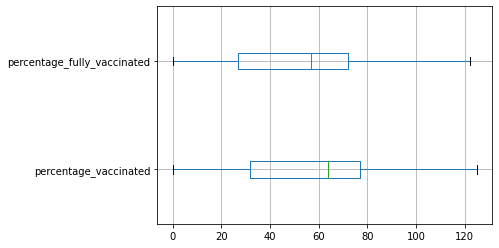

In [283]:
# boxplot to check if there are outliers values for these two new columns
boxplot = vaccinationDF.boxplot(
    column=['percentage_vaccinated', 'percentage_fully_vaccinated'],
    vert=False
)

In [284]:
# identifying the countries with percentage greater or equal than 100%
countriesToRemove = vaccinationDF.loc[
  (vaccinationDF.percentage_vaccinated >= 100) | 
  (vaccinationDF.percentage_fully_vaccinated >= 100) 
]

# checking the dataframe first elements
countriesToRemove.head()

,people_vaccinated,people_fully_vaccinated,population,percentage_vaccinated,percentage_fully_vaccinated
location,,,,,
Gibraltar,42010.0,40966.0,33691.0,125.0,122.0
Northern Cyprus,284357.0,275988.0,0.0,inf,inf
Pitcairn,47.0,47.0,47.0,100.0,100.0


We are going to exclude the countries below from the chart: 
* `Northern_Cyprus`: has the variable `population` set as zero. 
* `Gibraltar`: vaccinated more than 100% of the population. Probably people from other countries were vaccinated there or the data is wrong
* `Pitcairn`: this country has only 47 people so we are not going to consider it.

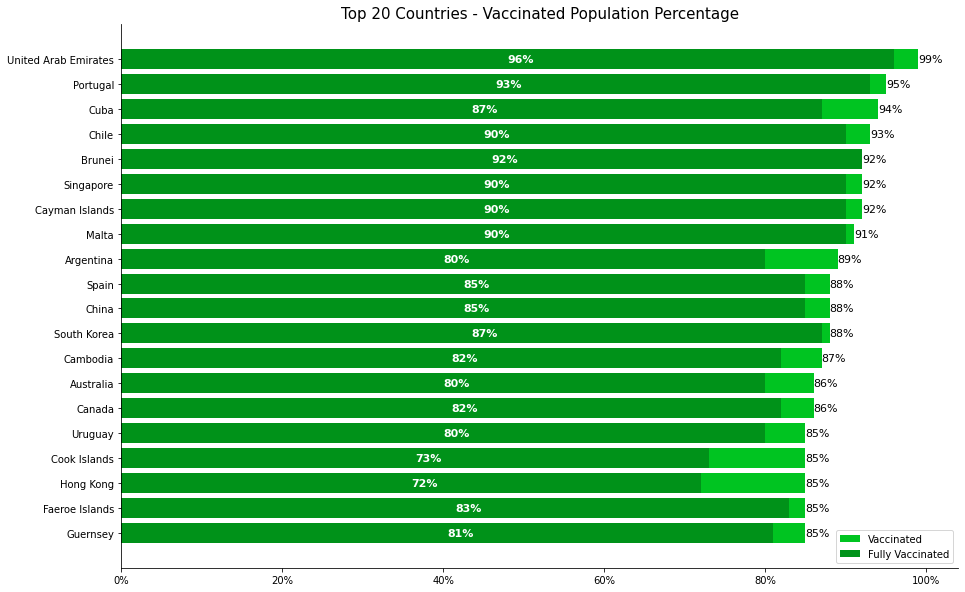

In [285]:
import matplotlib.ticker as mtick

# checking the first lines of the dataframe
fig, ax = plt.subplots(figsize=(15,10))

# sorting the dataframe
vaccinationDF = vaccinationDF.sort_values(by=['percentage_vaccinated'], ascending=False)

# removing from the dataframe the countries we want to exclude
vaccinationCleanDF = vaccinationDF.loc[
  ~vaccinationDF.index.isin(countriesToRemove.index)
].head(20)

# ploting the first bar chart
p1 = ax.barh(
  vaccinationCleanDF.index, 
  'percentage_vaccinated', 
  data=vaccinationCleanDF,
  label='Vaccinated',
  color='#00c421'
);

# formating the first bar chart
for bar in p1:
  width = bar.get_width().astype(int)
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(
    width, 
    label_y_pos, 
    s=f'{width/100:,.0%}', 
    va='center', 
    fontsize=11
  )

# ploting the second bar chart
p2 = ax.barh(
  vaccinationCleanDF.index, 
  'percentage_fully_vaccinated', 
  data=vaccinationCleanDF,  
  label='Fully Vaccinated',
  color='#009219'
);

# formating the second bar chart
for bar in p2:
  width = bar.get_width().astype(int)
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(
    width/2, 
    label_y_pos, 
    s=f'{width/100:,.0%}', 
    va='center', 
    fontsize=11,
    color='#fff',
    fontweight='bold'
  )

# remove the spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# displaying the legend
ax.legend();

# set the chart title
ax.set_title(
  'Top 20 Countries - Vaccinated Population Percentage',
  fontsize=15
);

# formating the X axis in a percentage format
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# inverting the Y Axis 
plt.gca().invert_yaxis()

In [286]:
# installing pydeck
!pip install pydeck -q

### **3.6.2 Vaccination evolution - World** 🌎

In [287]:
# creating a new dataframe for the vaccination World evolution analysis
vaccinationEvolutionDF = covidDF.loc[(covidDF.location == 'World')].filter(['date','people_vaccinated', 'people_fully_vaccinated', 'population'])

# filling all NaN with zeros
vaccinationEvolutionDF = vaccinationEvolutionDF.fillna(0)

# creating the percentage columns
vaccinationEvolutionDF['percentage_vaccinated'] = round(vaccinationEvolutionDF.people_vaccinated / vaccinationEvolutionDF.population,2) * 100
vaccinationEvolutionDF['percentage_fully_vaccinated'] = round(vaccinationEvolutionDF.people_fully_vaccinated / vaccinationEvolutionDF.population,2) * 100

# checking the dataframe first elements
vaccinationEvolutionDF.head()


,date,people_vaccinated,people_fully_vaccinated,population,percentage_vaccinated,percentage_fully_vaccinated
165222,2020-01-22,0.0,0.0,7.874966e+09,0.0,0.0
165223,2020-01-23,0.0,0.0,7.874966e+09,0.0,0.0
165224,2020-01-24,0.0,0.0,7.874966e+09,0.0,0.0
165225,2020-01-25,0.0,0.0,7.874966e+09,0.0,0.0
165226,2020-01-26,0.0,0.0,7.874966e+09,0.0,0.0


Now lets plot a chart to a better visualization:

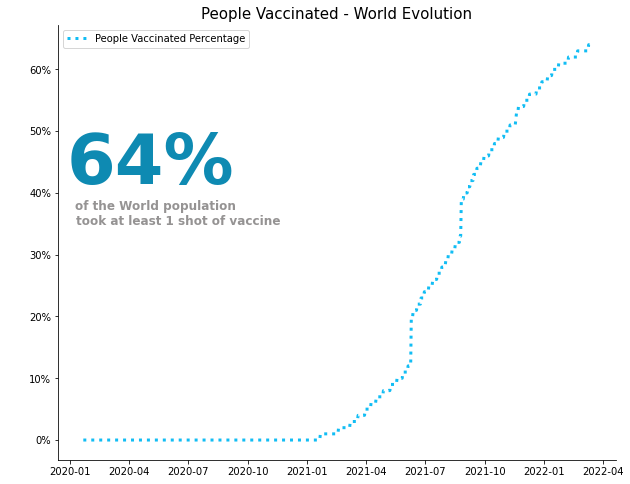

In [288]:
fig, ax = plt.subplots(figsize=(10,8))

# ploting the dataframe values
ax.plot(
  'date',
  'percentage_vaccinated',
  data=vaccinationEvolutionDF,
  label='People Vaccinated Percentage',
  color='#12bdf4',
  linewidth=3,
  linestyle=':'
);

# formating the X axis in a percentage format
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# remove the spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(
  150,
  320, 
  str(format(vaccinationEvolutionDF.percentage_vaccinated.max()/100,'0,.0%')), 
  fontsize=70,
  fontweight='bold',
  color='#0e8ab2',
  ha='center', 
  va='center',
  transform=None
)

ax.text(
  160,
  270, 
  'of the World population  \n         took at least 1 shot of vaccine', 
  fontsize=12,
  fontweight='bold',
  color='#959393',
  ha='center', 
  va='center',
  transform=None
)

# displaying the legend
ax.legend();

# setting the title
ax.set_title(
  'People Vaccinated - World Evolution',
  fontsize=15
);

### **3.6.3 Vaccination evolution - Brazil** 🇧🇷

In [289]:
# creating a new dataframe for the vaccination World evolution analysis
vaccinationBREvolutionDF = covidDF.loc[(covidDF.location == 'Brazil')].filter(['date','people_vaccinated', 'people_fully_vaccinated', 'population'])

# filling all NaN with zeros
vaccinationBREvolutionDF = vaccinationBREvolutionDF.fillna(0)

# creating the percentage columns
vaccinationBREvolutionDF['percentage_vaccinated'] = round(vaccinationBREvolutionDF.people_vaccinated / vaccinationBREvolutionDF.population,2) * 100
vaccinationBREvolutionDF['percentage_fully_vaccinated'] = round(vaccinationBREvolutionDF.people_fully_vaccinated / vaccinationBREvolutionDF.population,2) * 100

# cleaning the days where there is no vaccionation info
vaccinationBREvolutionDF.drop(
    vaccinationBREvolutionDF.loc[vaccinationBREvolutionDF.people_vaccinated == 0].index,
    axis=0,
    inplace=True
)

# checking the dataframe first elements
vaccinationBREvolutionDF.head()


,date,people_vaccinated,people_fully_vaccinated,population,percentage_vaccinated,percentage_fully_vaccinated
21862,2021-01-17,112.0,0.0,213993441.0,0.0,0.0
21863,2021-01-18,1109.0,0.0,213993441.0,0.0,0.0
21864,2021-01-19,13527.0,0.0,213993441.0,0.0,0.0
21865,2021-01-20,105824.0,0.0,213993441.0,0.0,0.0
21866,2021-01-21,193699.0,0.0,213993441.0,0.0,0.0


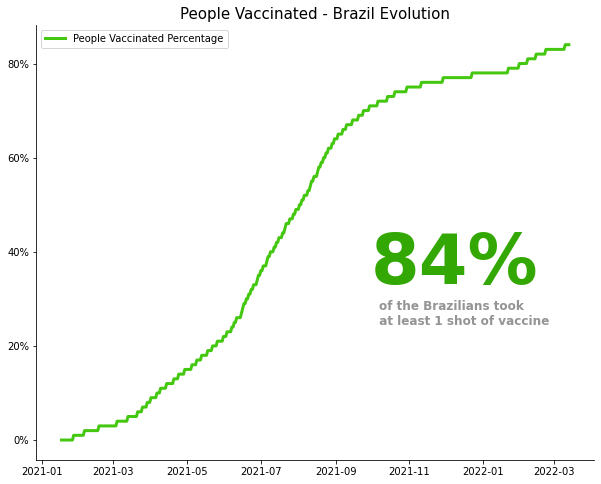

In [290]:
fig, axBR = plt.subplots(figsize=(10,8))

# ploting the dataframe values
axBR.plot(
  'date',
  'percentage_vaccinated',
  data=vaccinationBREvolutionDF,
  label='People Vaccinated Percentage',
  color='#44c70f',
  linewidth=3
);

# formating the X axis in a percentage format
axBR.yaxis.set_major_formatter(mtick.PercentFormatter())

# remove the spines from the plot
axBR.spines['top'].set_visible(False)
axBR.spines['right'].set_visible(False)

axBR.text(
  455,
  220, 
  str(format(vaccinationBREvolutionDF.percentage_vaccinated.max()/100,'0,.0%')), 
  fontsize=70,
  fontweight='bold',
  color='#33a804',
  ha='center', 
  va='center',
  transform=None
)

axBR.text(
  460,
  170, 
  'of the Brazilians took    \n  at least 1 shot of vaccine', 
  fontsize=12,
  fontweight='bold',
  color='#959393',
  ha='center', 
  va='center',
  transform=None
)

# displaying the legend
axBR.legend();

# setting the title
axBR.set_title(
  'People Vaccinated - Brazil Evolution',
  fontsize=15
);

### **3.6.4 - Vaccination evolution - World map overview**

Now lets look at the good side, see the vaccination evolution around the world. The larger the blue spot, the greater the number of vaccinated people.

In [291]:
# creating a new column total_cases in the covid heat map dataframe
covidVaccinationHeatMapDF = pd.merge(
    vaccinationDF,
    countriesPositionDF,
    how='left',
    left_on='location',
    right_on='name')

# filling NaN columns with zero
covidVaccinationHeatMapDF = covidVaccinationHeatMapDF.fillna(0)

In [292]:
# drop rows with latitude equal to zero
covidVaccinationHeatMapDF.drop(
    covidCasesHeatMapDF[covidVaccinationHeatMapDF.latitude == 0].index,
    axis=0,
    inplace=True
)

# checking the Cases HeatMap dataframe
covidVaccinationHeatMapDF.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,people_vaccinated,people_fully_vaccinated,population,percentage_vaccinated,percentage_fully_vaccinated,country,latitude,longitude,name
1,42010.0,40966.0,33691.0,125.0,122.0,GI,36.137741,-5.345374,Gibraltar
3,9890548.0,9554269.0,9991083.0,99.0,96.0,AE,23.424076,53.847818,United Arab Emirates
4,9663542.0,9415073.0,10167923.0,95.0,93.0,PT,39.399872,-8.224454,Portugal
5,10619533.0,9895550.0,11317498.0,94.0,87.0,CU,21.521757,-77.781167,Cuba
6,17828485.0,17283367.0,19212362.0,93.0,90.0,CL,-35.675147,-71.542969,Chile


In [293]:
# creating the view for the HeatMap
viewVaccination = pdk.data_utils.compute_view(covidVaccinationHeatMapDF[["longitude", "latitude"]])
viewVaccination.zoom = 1

# creating the layer for the HeatMap
totalDeathsLayer = pdk.Layer(
    "ScatterplotLayer",
    covidVaccinationHeatMapDF,
    pickable=True,
    opacity=0.8,
    stroked=True,
    filled=True,
    radius_scale=6000,
    radius_min_pixels=0,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position=['longitude', 'latitude'],
    get_radius="percentage_vaccinated",
    get_fill_color=[3, 87, 243],
    get_line_color=[3, 87, 243],
)

In [294]:
# creating the tooltip for each point
vaccinationTooltip = {
  "html": """ <b>Location: </b> {location} <br/>
              <b>Population Vaccinated: </b> {percentage_vaccinated}%
          """.format(location="{name}", percentage_vaccinated=f"{'{percentage_vaccinated}'}")
}

# creating the map
map = pdk.Deck(
    layers=[totalDeathsLayer],
    initial_view_state=view,
    map_provider='carto',
    map_style='dark',
    tooltip=vaccinationTooltip
)

# saving the map
map.to_html("heatmap_vaccination_layer.html")

<IPython.core.display.Javascript object>

'<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n    <title>pydeck</title>\n        <script src="https://api.tiles.mapbox.com/mapbox-gl-js/v1.13.0/mapbox-gl.js"></script>\n        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css" />\n    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css" />\n    <script src=\'https://cdn.jsdelivr.net/npm/@deck.gl/jupyter-widget@~8.5.*/dist/index.js\'></script>\n    <style>\n    body {\n  margin: 0;\n  padding: 0;\n  overflow: hidden;\n}\n\n#deck-map-container {\n  width: 100%;\n  height: 100%;\n  background-color: black;\n}\n\n#map {\n  pointer-events: none;\n  height: 100%;\n  width: 100%;\n  position: absolute;\n  z-index: 1;\n}\n\n#deckgl-overlay {\n  z-index: 2;\n  background: none;\n}\n\n#deck-map-wrapper {\n  width: 100%;\n  height: 100%;\n}\n\n#deck-container {\n  width: 100v

# **4. Conclusions**
---

It's important to notice that the data is updated daily and this dataset will be obselete soon.

Nevertheless we could identify some important information from this context:

* USA are by far the leader in cases and deaths
* The number of cases in Brazil are increasing speedily
* After the `Omicron` variant the number of cases worldwide are skyrocketing rapidly
* The `United Arab Emirates` and `Portugal` are the only countries with more than 90% of people vaccinated and fully vaccinated

We reached to 64% of people around the world with at least 1 shoot of the COVID-19 vaccine.

Since the data depends on the countries input, some of the data might not be 100% correct. Talking about Brazil for instance, the Department of Health is in a constant fight with the states because of the way to count cases and total deaths.


